<a href="https://www.kaggle.com/code/lalit7881/e-commerce-pricing-insights-india?scriptVersionId=297612890" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-e-commerce-pricing-revenue-growth/indian_ecommerce_pricing_revenue_growth_36_months.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/indian-e-commerce-pricing-revenue-growth/indian_ecommerce_pricing_revenue_growth_36_months.csv")

In [3]:
df.head()

,order_id,order_date,state,zone,category,brand_type,customer_gender,customer_age,base_price,discount_percent,final_price,units_sold,revenue,sales_event,competition_intensity,inventory_pressure
0,ORD0000001,2023-01-31,West Bengal,East,Fashion,Mass,Male,28,1810.89,65.00,633.81,29,18380.49,Normal,Medium,High
1,ORD0000002,2023-01-31,Gujarat,West,Sports & Fitness,Mass,Male,19,5678.15,50.83,2791.95,67,187060.65,Normal,Medium,High
2,ORD0000003,2023-01-31,Delhi NCR,North,Grocery Essentials,Mass,Male,25,169.98,35.26,110.05,57,6272.85,Normal,Medium,Low
3,ORD0000004,2023-01-31,Madhya Pradesh,Central,Footwear,Mass,Female,30,3244.91,61.94,1235.01,55,67925.55,Normal,High,High
4,ORD0000005,2023-01-31,Haryana,North,Fashion,Premium,Female,33,697.44,48.27,360.79,29,10462.91,Festival,Medium,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30600 entries, 0 to 30599
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               30600 non-null  object 
 1   order_date             30600 non-null  object 
 2   state                  30600 non-null  object 
 3   zone                   30600 non-null  object 
 4   category               30600 non-null  object 
 5   brand_type             30600 non-null  object 
 6   customer_gender        30600 non-null  object 
 7   customer_age           30600 non-null  int64  
 8   base_price             30600 non-null  float64
 9   discount_percent       30600 non-null  float64
 10  final_price            30600 non-null  float64
 11  units_sold             30600 non-null  int64  
 12  revenue                30600 non-null  float64
 13  sales_event            30600 non-null  object 
 14  competition_intensity  30600 non-null  object 
 15  in

In [5]:
df.describe()

,customer_age,base_price,discount_percent,final_price,units_sold,revenue
count,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000,30600.000000
mean,35.568268,3898.637966,38.111218,2415.015197,31.705490,71062.430294
std,12.872780,3371.290126,16.608485,2264.892146,21.381121,83626.572222
min,18.000000,100.030000,0.010000,35.010000,2.000000,247.800000
25%,25.000000,1314.637500,24.840000,747.010000,16.000000,16689.700000
50%,33.000000,2975.015000,37.290000,1728.605000,27.000000,42138.510000
75%,45.000000,5342.480000,51.840000,3309.630000,42.000000,92589.245000
max,65.000000,14999.170000,65.000000,14682.280000,161.000000,906141.040000


In [6]:
df.isnull().sum()

order_id                 0
order_date               0
state                    0
zone                     0
category                 0
brand_type               0
customer_gender          0
customer_age             0
base_price               0
discount_percent         0
final_price              0
units_sold               0
revenue                  0
sales_event              0
competition_intensity    0
inventory_pressure       0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

order_id                  object
order_date                object
state                     object
zone                      object
category                  object
brand_type                object
customer_gender           object
customer_age               int64
base_price               float64
discount_percent         float64
final_price              float64
units_sold                 int64
revenue                  float64
sales_event               object
competition_intensity     object
inventory_pressure        object
dtype: object

In [9]:
df.shape

(30600, 16)

In [10]:
df.nunique()

order_id                 30600
order_date                  36
state                       14
zone                         5
category                     8
brand_type                   2
customer_gender              2
customer_age                48
base_price               29997
discount_percent          5976
final_price              29649
units_sold                 146
revenue                  30509
sales_event                  2
competition_intensity        3
inventory_pressure           2
dtype: int64

In [11]:
df.columns

Index(['order_id', 'order_date', 'state', 'zone', 'category', 'brand_type',
       'customer_gender', 'customer_age', 'base_price', 'discount_percent',
       'final_price', 'units_sold', 'revenue', 'sales_event',
       'competition_intensity', 'inventory_pressure'],
      dtype='object')

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()
print('Missing Values in Each Column:')
print(missing_values)

# If any missing values found in order_date, log them as they could impair time-series analyses
if missing_values['order_date'] > 0:
    print('Warning: There are missing values in order_date that may need further treatment.')

# Convert categorical columns to category type for memory efficiency
categorical_cols = ['order_id', 'state', 'zone', 'category', 'brand_type', 'customer_gender', 'sales_event', 'competition_intensity', 'inventory_pressure']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Display data types for verification
df.dtypes

Missing Values in Each Column:
order_id                 0
order_date               0
state                    0
zone                     0
category                 0
brand_type               0
customer_gender          0
customer_age             0
base_price               0
discount_percent         0
final_price              0
units_sold               0
revenue                  0
sales_event              0
competition_intensity    0
inventory_pressure       0
dtype: int64


order_id                       category
order_date               datetime64[ns]
state                          category
zone                           category
category                       category
brand_type                     category
customer_gender                category
customer_age                      int64
base_price                      float64
discount_percent                float64
final_price                     float64
units_sold                        int64
revenue                         float64
sales_event                    category
competition_intensity          category
inventory_pressure             category
dtype: object

## EDA

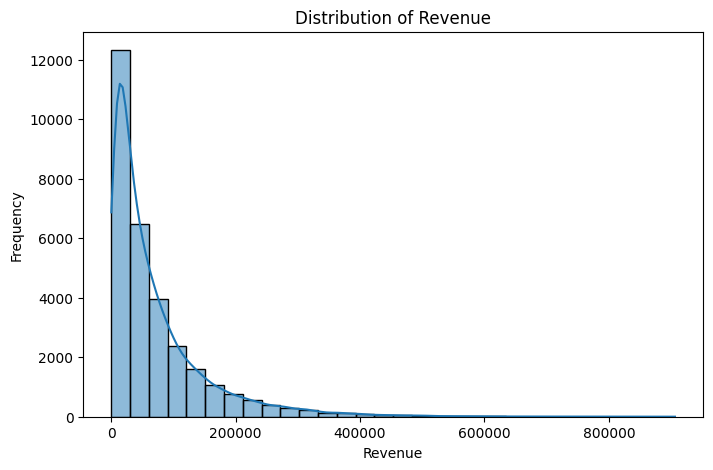

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['revenue'], bins=30, kde=True)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()


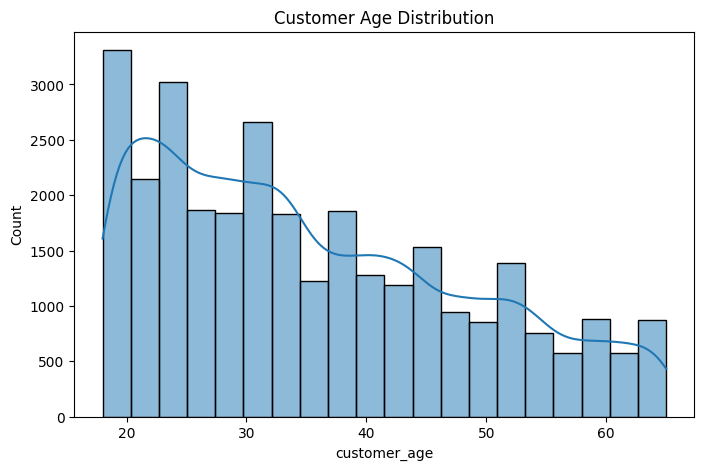

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['customer_age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()


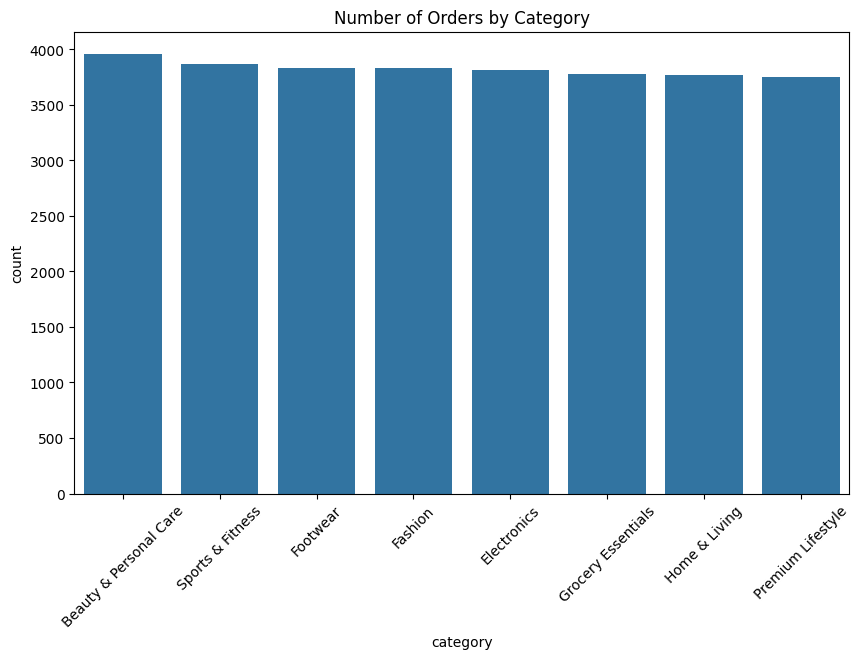

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title("Number of Orders by Category")
plt.xticks(rotation=45)
plt.show()


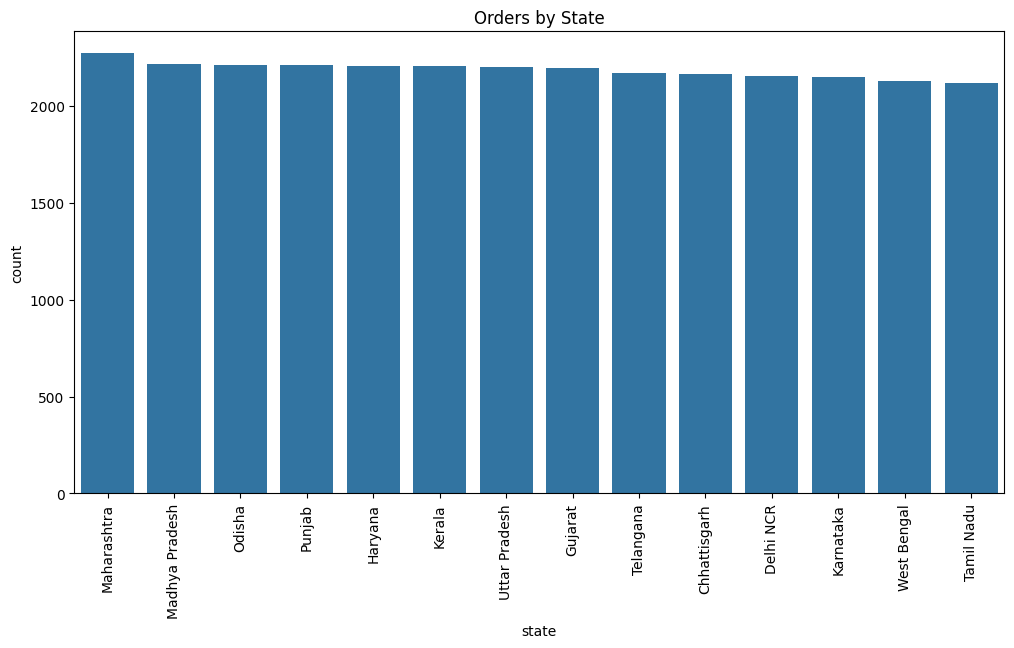

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title("Orders by State")
plt.xticks(rotation=90)
plt.show()


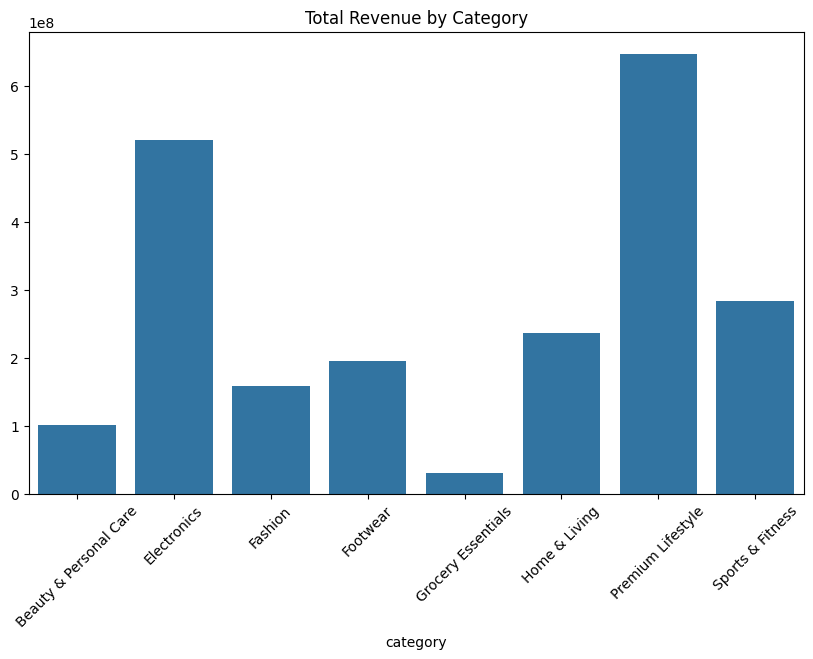

In [17]:
plt.figure(figsize=(10,6))
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title("Total Revenue by Category")
plt.xticks(rotation=45)
plt.show()


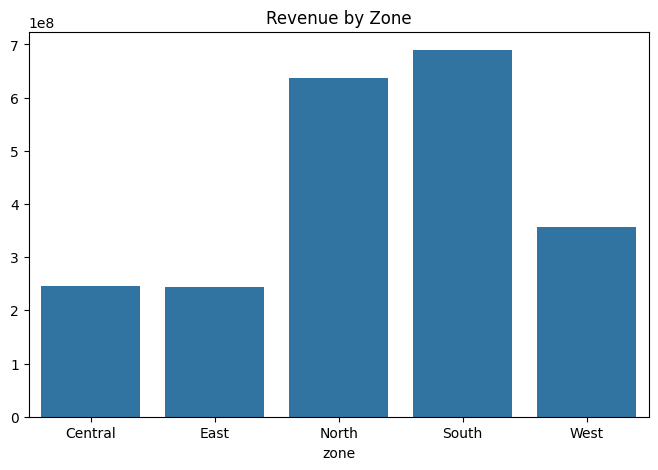

In [18]:
plt.figure(figsize=(8,5))
zone_revenue = df.groupby('zone')['revenue'].sum()

sns.barplot(x=zone_revenue.index, y=zone_revenue.values)
plt.title("Revenue by Zone")
plt.show()


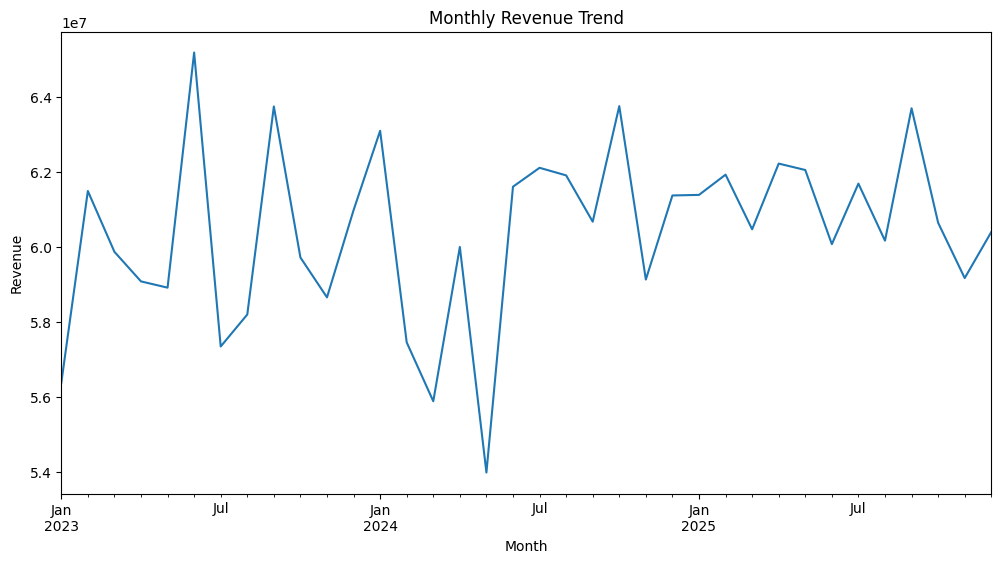

In [19]:
monthly_revenue = df.resample('M', on='order_date')['revenue'].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


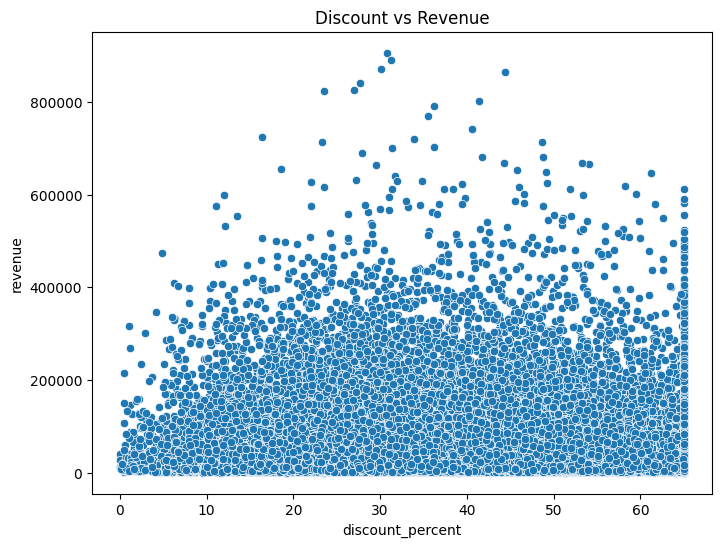

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='discount_percent', y='revenue')
plt.title("Discount vs Revenue")
plt.show()


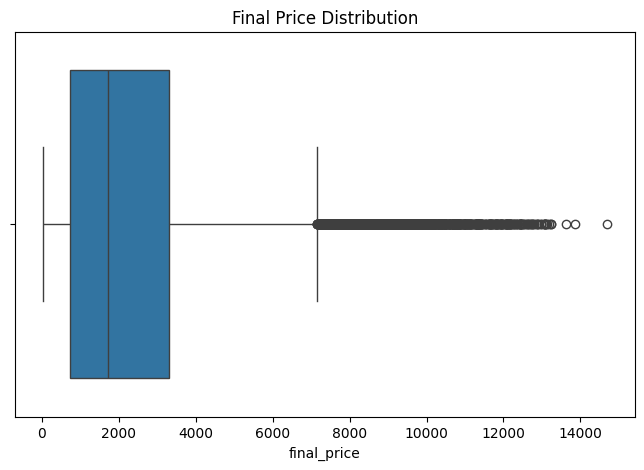

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['final_price'])
plt.title("Final Price Distribution")
plt.show()


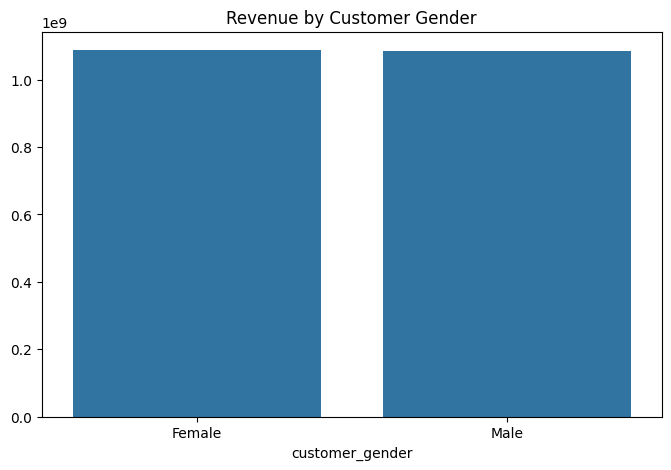

In [22]:
plt.figure(figsize=(8,5))
gender_revenue = df.groupby('customer_gender')['revenue'].sum()

sns.barplot(x=gender_revenue.index, y=gender_revenue.values)
plt.title("Revenue by Customer Gender")
plt.show()


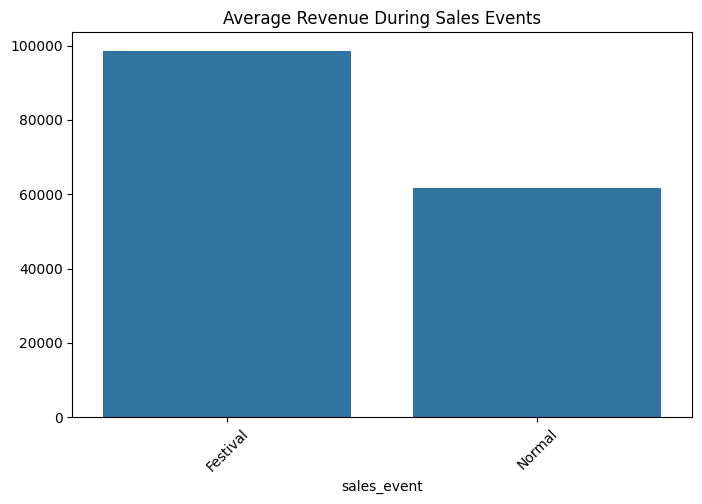

In [23]:
plt.figure(figsize=(8,5))
event_revenue = df.groupby('sales_event')['revenue'].mean()

sns.barplot(x=event_revenue.index, y=event_revenue.values)
plt.title("Average Revenue During Sales Events")
plt.xticks(rotation=45)
plt.show()


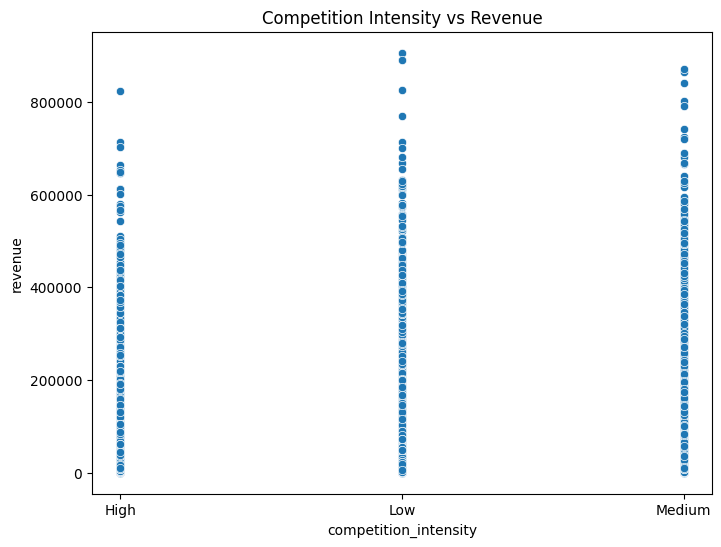

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='competition_intensity', y='revenue')
plt.title("Competition Intensity vs Revenue")
plt.show()


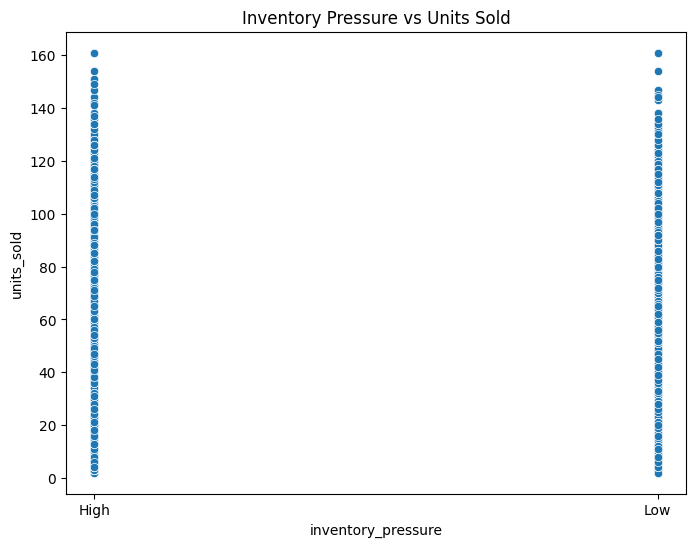

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='inventory_pressure', y='units_sold')
plt.title("Inventory Pressure vs Units Sold")
plt.show()


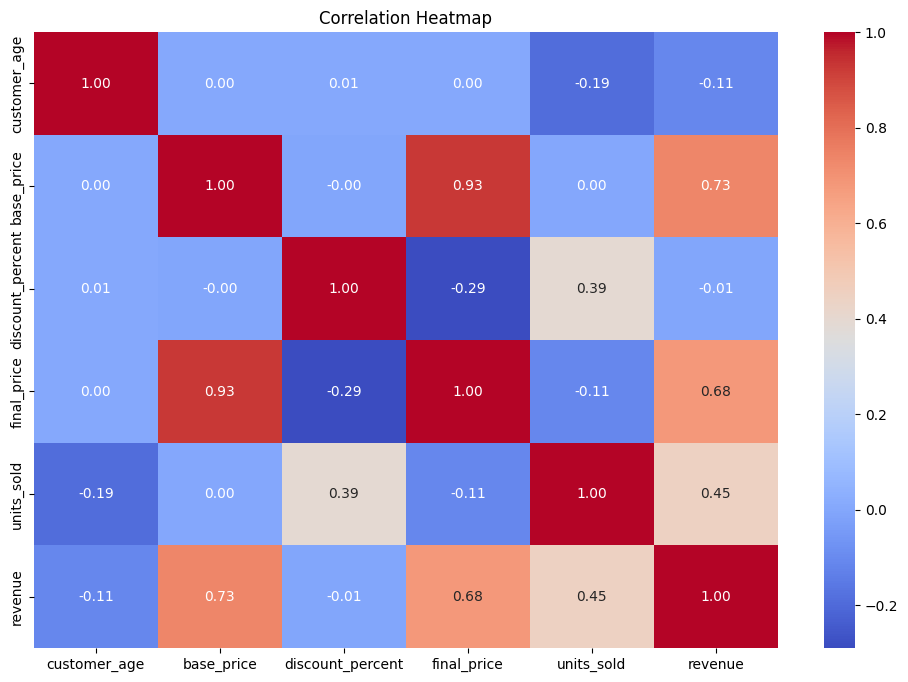

In [26]:
plt.figure(figsize=(12,8))

numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


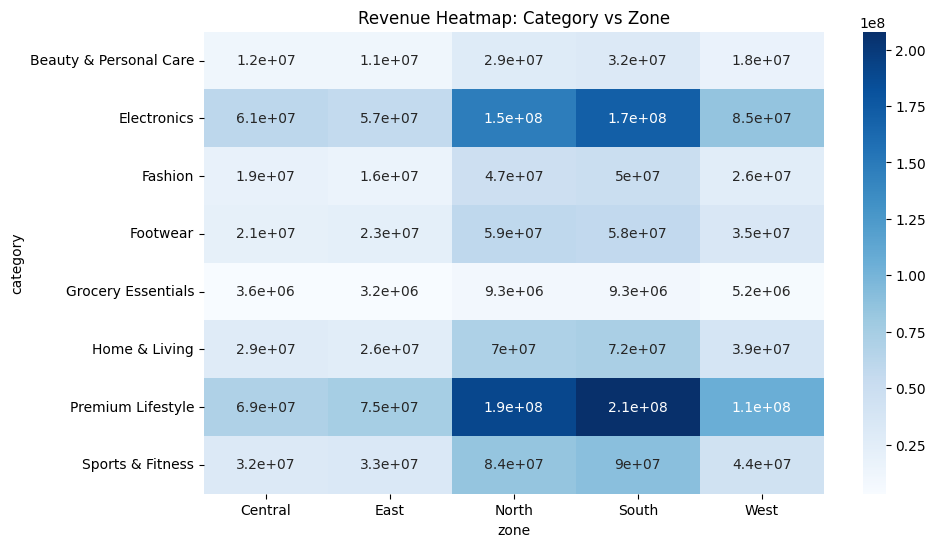

In [27]:
pivot_table = df.pivot_table(
    values='revenue',
    index='category',
    columns='zone',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title("Revenue Heatmap: Category vs Zone")
plt.show()


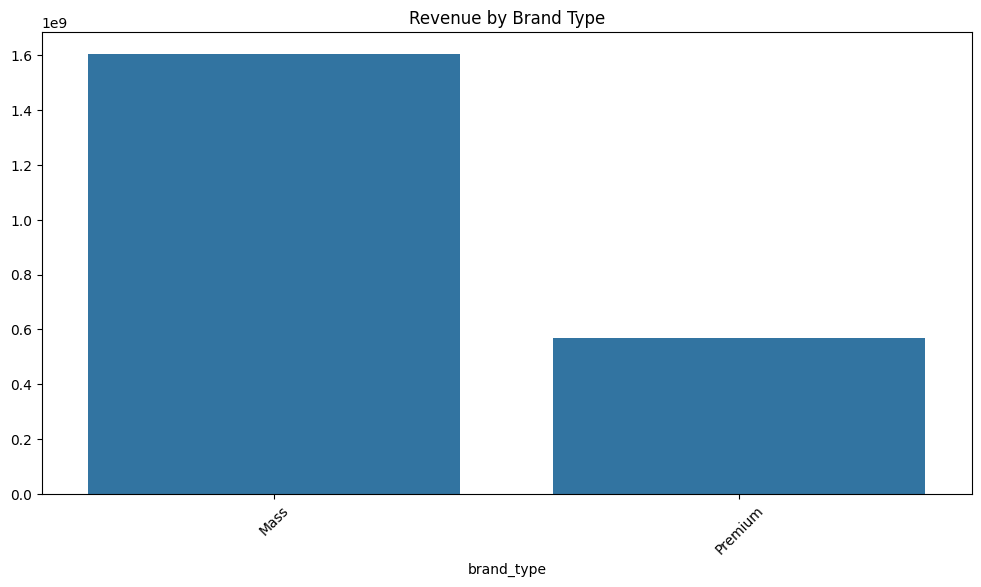

In [28]:
plt.figure(figsize=(12,6))

top_brands = df.groupby('brand_type')['revenue'].sum().sort_values(ascending=False)

sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Revenue by Brand Type")
plt.xticks(rotation=45)
plt.show()


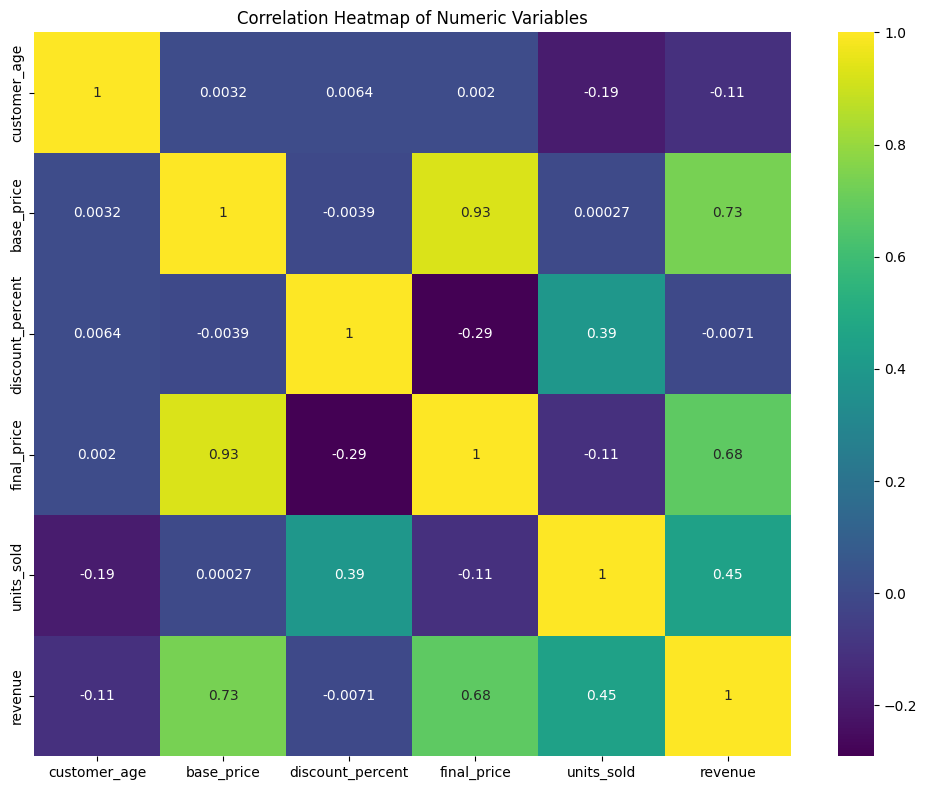

In [29]:
numeric_df = df.select_dtypes(include=[np.number])

# Check if there are four or more numeric columns
if numeric_df.shape[1] >= 4:
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='viridis')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns to generate a heatmap.')

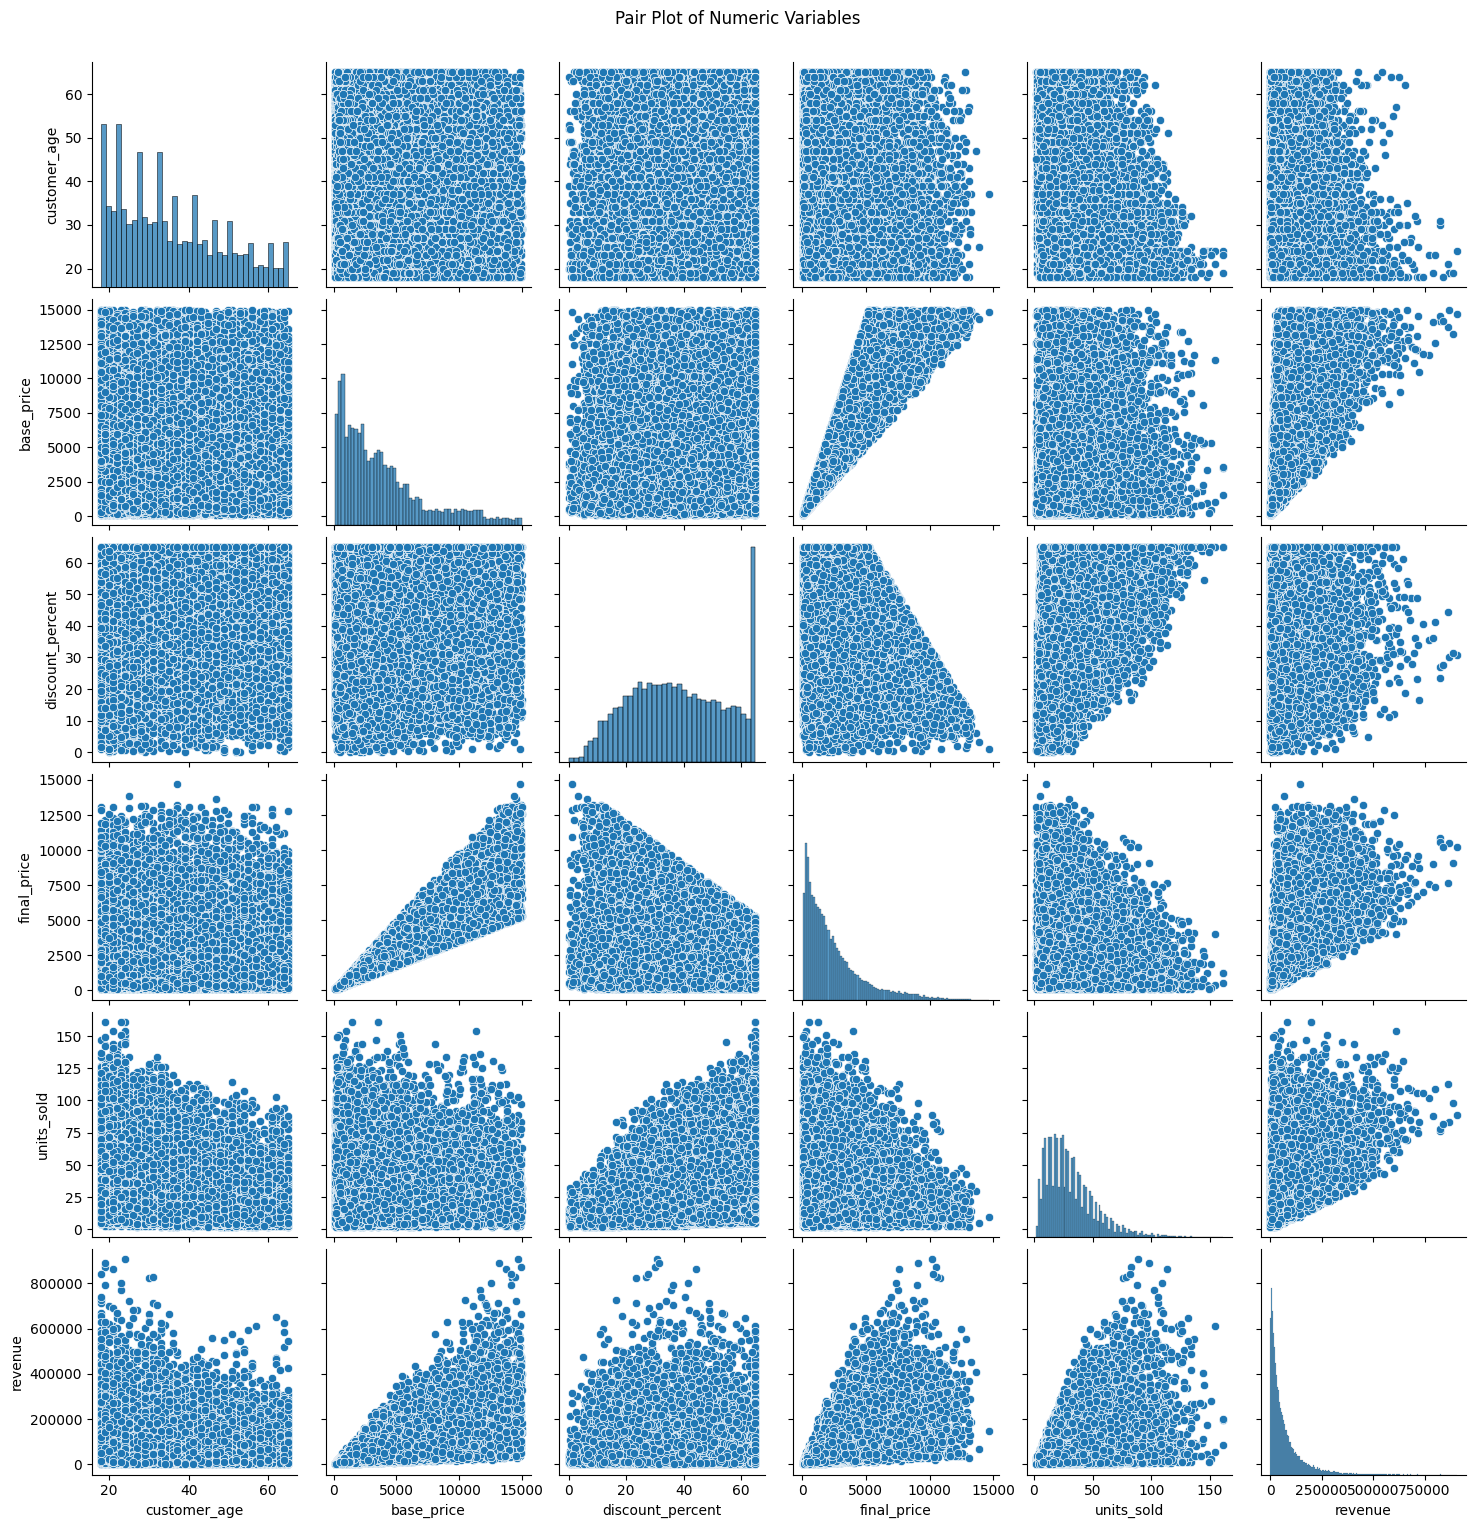

In [30]:
if numeric_df.shape[1] >= 4:
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
    plt.show()
else:
    print('Not enough numeric columns to generate a pair plot.')

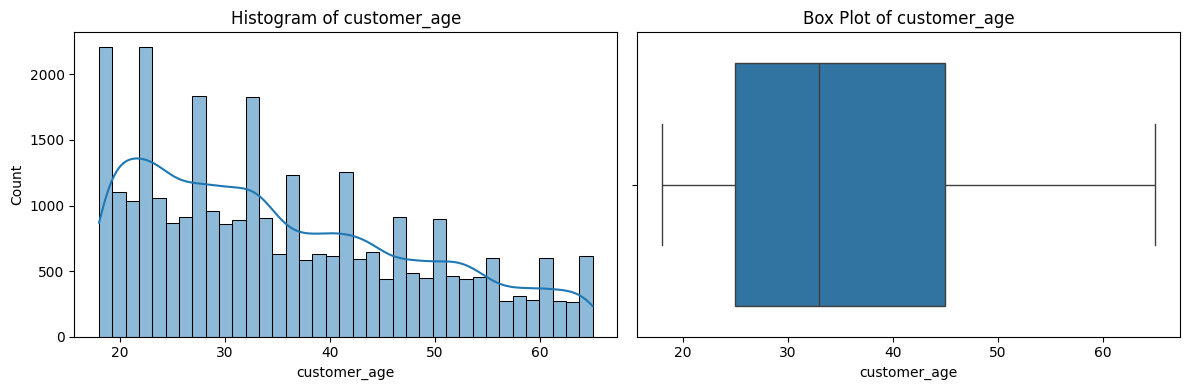

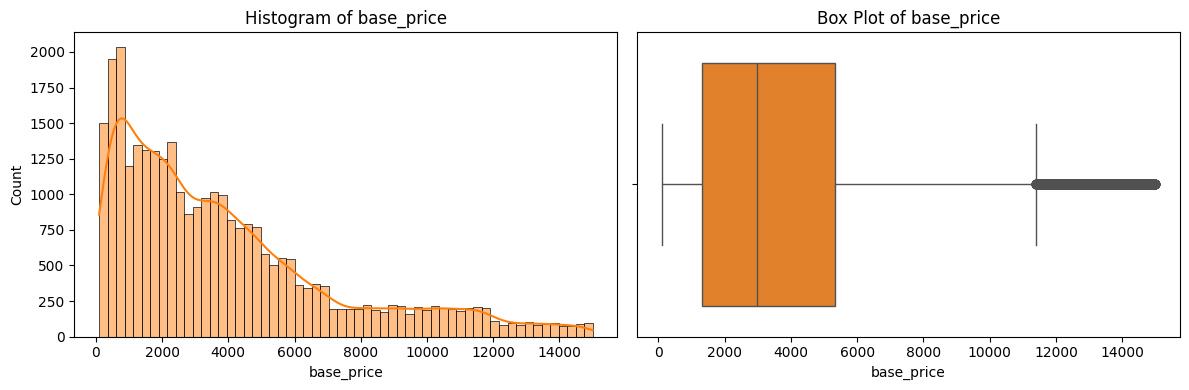

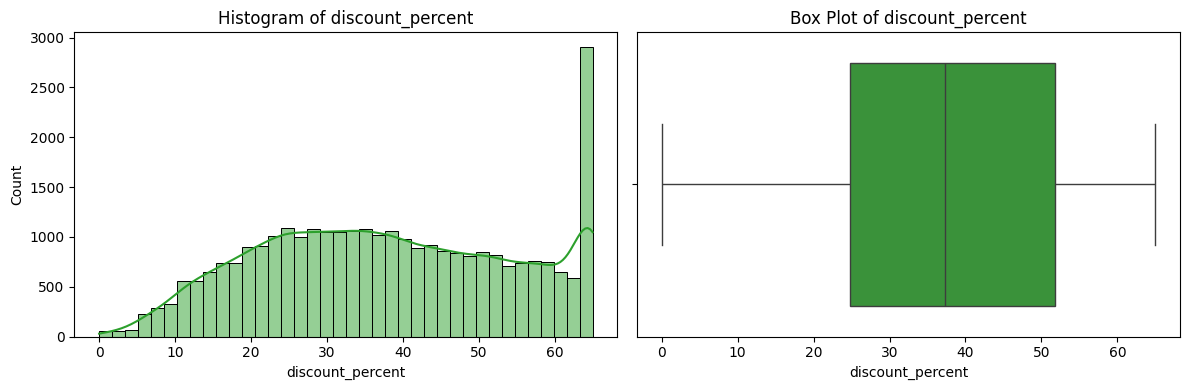

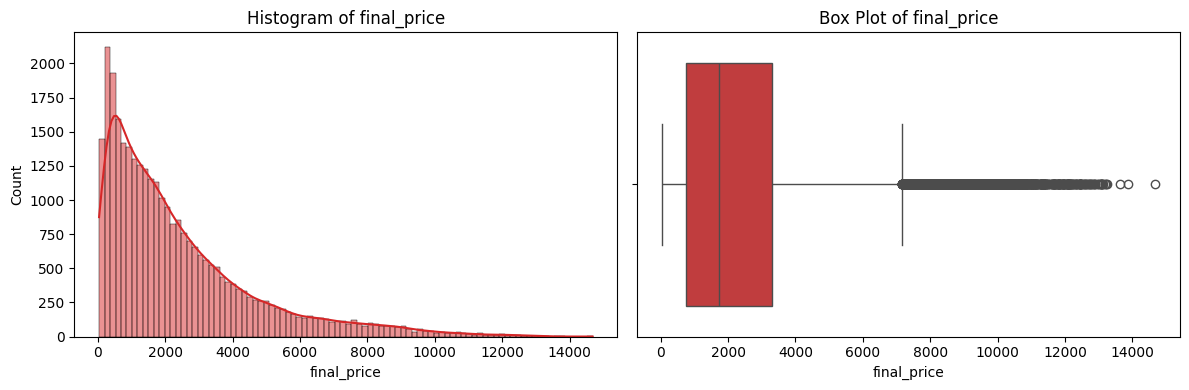

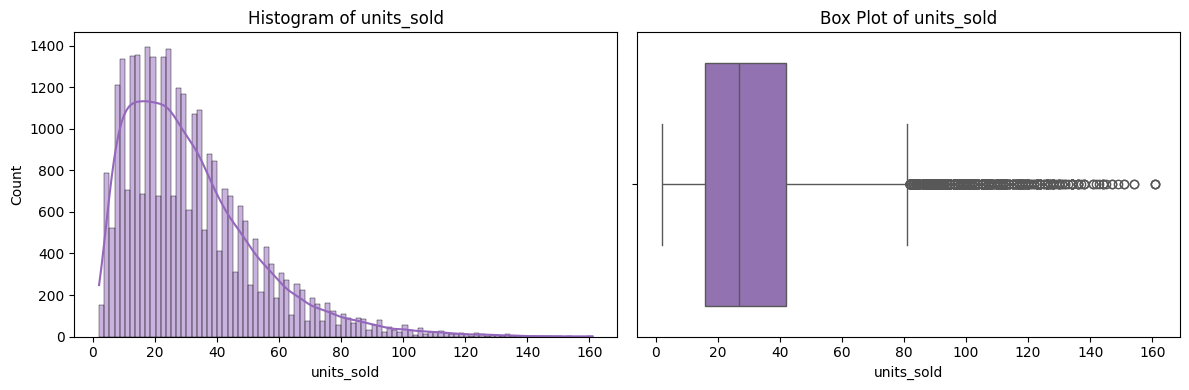

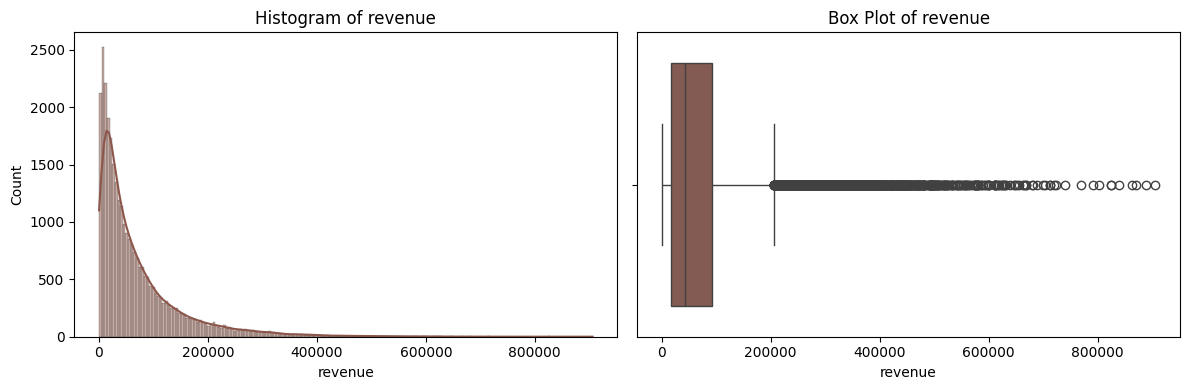

In [31]:
numeric_columns = ['customer_age', 'base_price', 'discount_percent', 
                   'final_price', 'units_sold', 'revenue']

# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', 
          '#d62728', '#9467bd', '#8c564b']

for col, color in zip(numeric_columns, colors):
    if col in df.columns:
        plt.figure(figsize=(12, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color=color)
        plt.title(f'Histogram of {col}')
        
        # Boxplot (lighter shade)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color=color)
        plt.title(f'Box Plot of {col}')
        
        plt.tight_layout()
        plt.show()

In [32]:
categorical_columns = ['state', 'zone', 'category', 'brand_type', 
                       'customer_gender', 'sales_event', 
                       'competition_intensity', 'inventory_pressure']


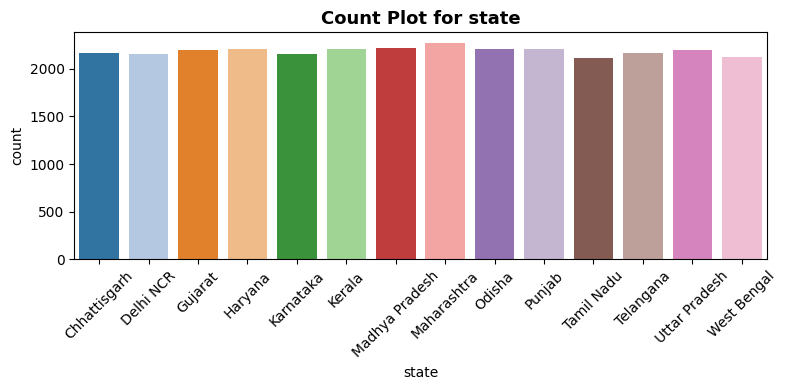

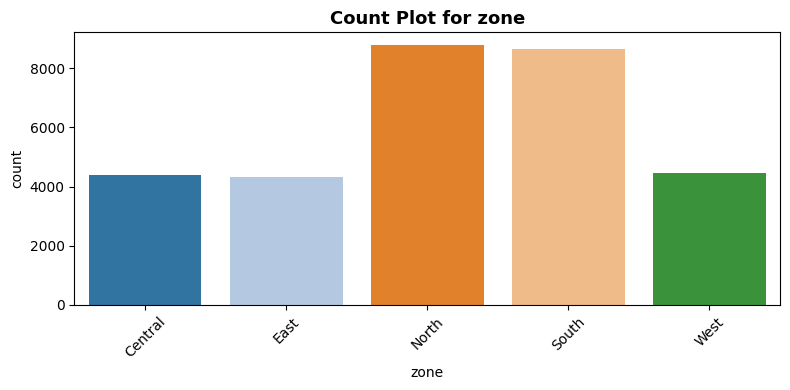

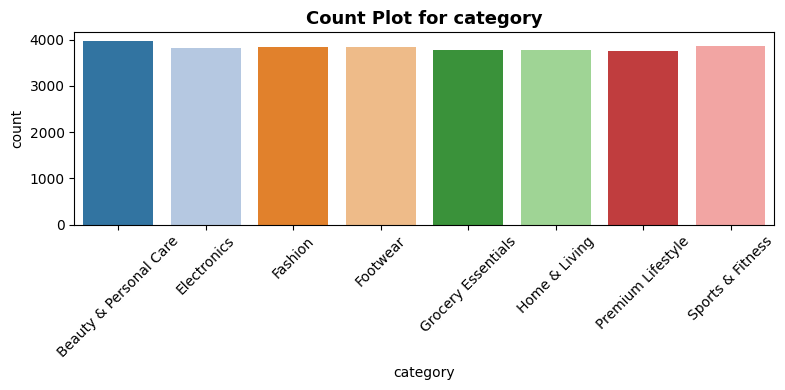

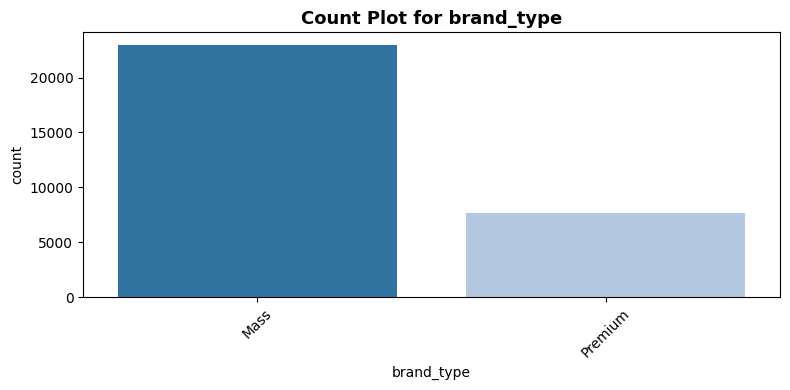

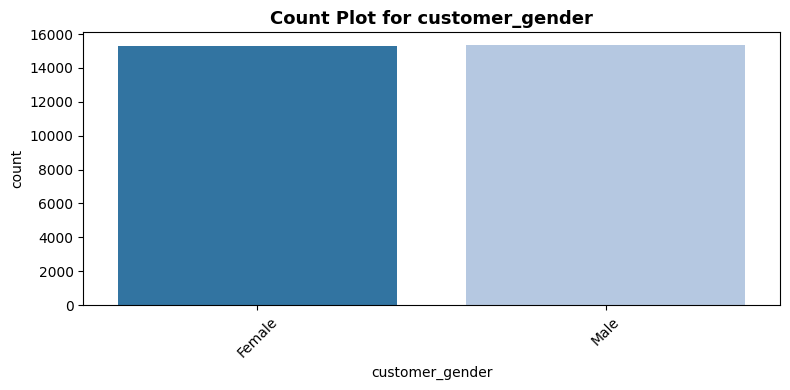

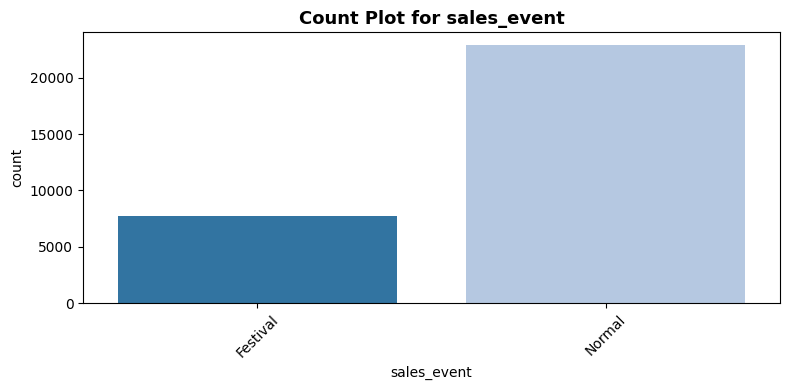

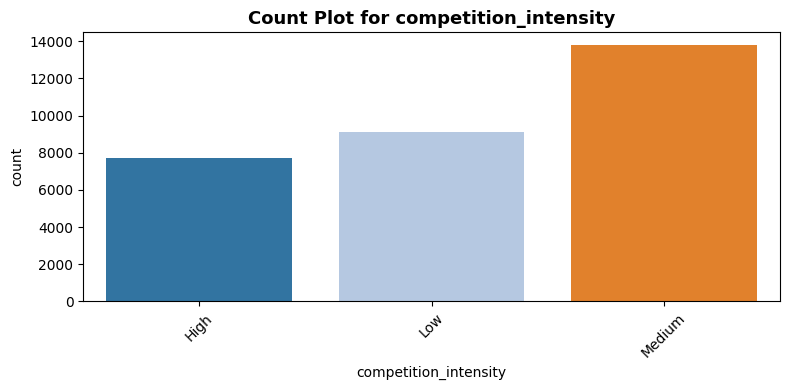

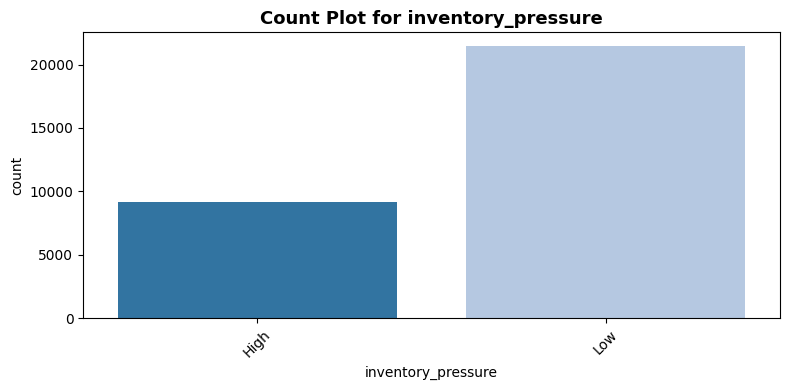

In [33]:
import random

for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        
        unique_vals = df[col].unique()
        colors = sns.color_palette("tab20", len(unique_vals))
        
        sns.countplot(data=df, x=col, palette=colors)
        
        plt.title(f'Count Plot for {col}', fontsize=13, fontweight='bold')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## Feature engg

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [35]:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except:
    xgb_available = False

RANDOM_STATE = 42

In [36]:
features = ['base_price', 'discount_percent', 
            'final_price', 'units_sold', 'customer_age']
target = 'revenue'

X = df[features].copy()
y = df[target].copy()

# Handle missing values
X.fillna(X.mean(), inplace=True)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Scale Data (Important for KNN & SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=RANDOM_STATE),
    "Random Forest": RandomForestRegressor(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingRegressor(random_state=RANDOM_STATE),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(random_state=RANDOM_STATE)

In [38]:
results = []

for name, model in models.items():
    
    # Use scaled data for KNN & SVR
    if name in ["KNN", "SVR"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, mse, mae])

In [39]:
results_df = pd.DataFrame(results, 
                          columns=["Model", "R2 Score", "MSE", "MAE"])

results_df = results_df.sort_values(by="R2 Score", ascending=False)

print(results_df)

               Model  R2 Score           MSE           MAE
4      Random Forest  0.999014  6.569337e+06    675.570183
8            XGBoost  0.997827  1.448749e+07   1950.114303
3      Decision Tree  0.996712  2.191552e+07   1618.591910
5  Gradient Boosting  0.994836  3.442113e+07   3814.120079
6                KNN  0.988525  7.649016e+07   4552.333706
2              Lasso  0.778244  1.478211e+09  23307.022353
1              Ridge  0.778244  1.478212e+09  23307.038726
0  Linear Regression  0.778244  1.478212e+09  23307.039772
7                SVR -0.080051  7.199547e+09  50250.580040


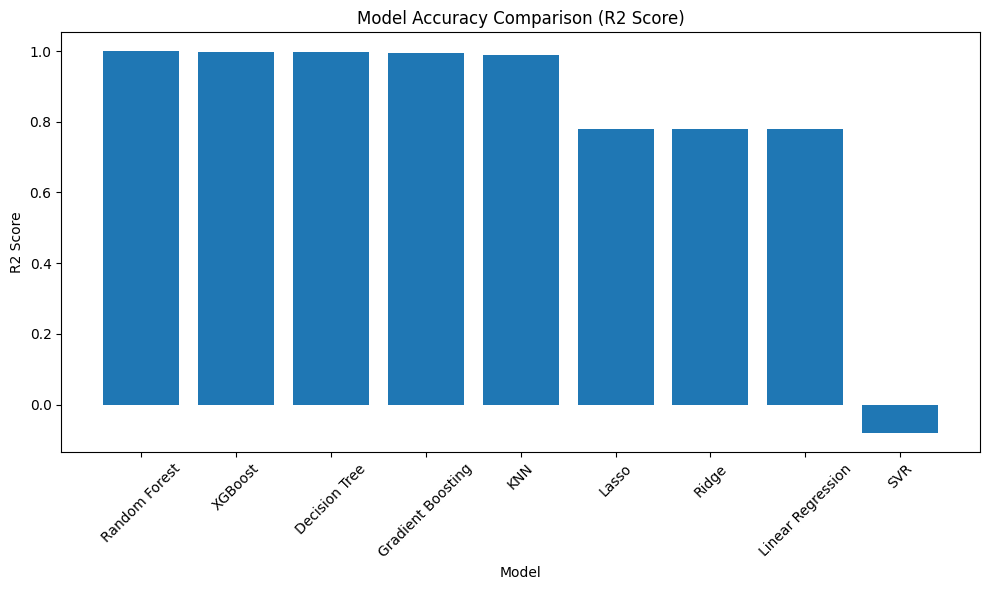

In [40]:
data = {
    "Model": [
        "Random Forest", "XGBoost", "Decision Tree",
        "Gradient Boosting", "KNN",
        "Lasso", "Ridge", "Linear Regression", "SVR"
    ],
    "R2 Score": [
        0.999014, 0.997827, 0.996712,
        0.994836, 0.988525,
        0.778244, 0.778244, 0.778244, -0.080051
    ]
}

results_df = pd.DataFrame(data)

# Sort values
results_df = results_df.sort_values(by="R2 Score", ascending=False)

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R2 Score"])

plt.xticks(rotation=45)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Model Accuracy Comparison (R2 Score)")
plt.tight_layout()
plt.show()

## Thank you..pls upvote!!!!!